<a href="https://colab.research.google.com/github/rtafurthgarcia/COM763/blob/main/COM_763_Week_2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descriptive Statistics using IRIS dataset

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris_df = pd.read_csv('Iris.csv')

# Show first few rows of the dataset
iris_df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
iris_df.drop(columns=['Id'], inplace=True)

In [4]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##Understanding the dataset

In [6]:
# Dataset information and basic structure
iris_df.info()

# Checking for missing values
iris_df.isnull().sum()

<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    str    
dtypes: float64(4), str(1)
memory usage: 6.0 KB


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##Summary statistics

In [ ]:
# Descriptive statistics summary
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##Visualizing Distributions

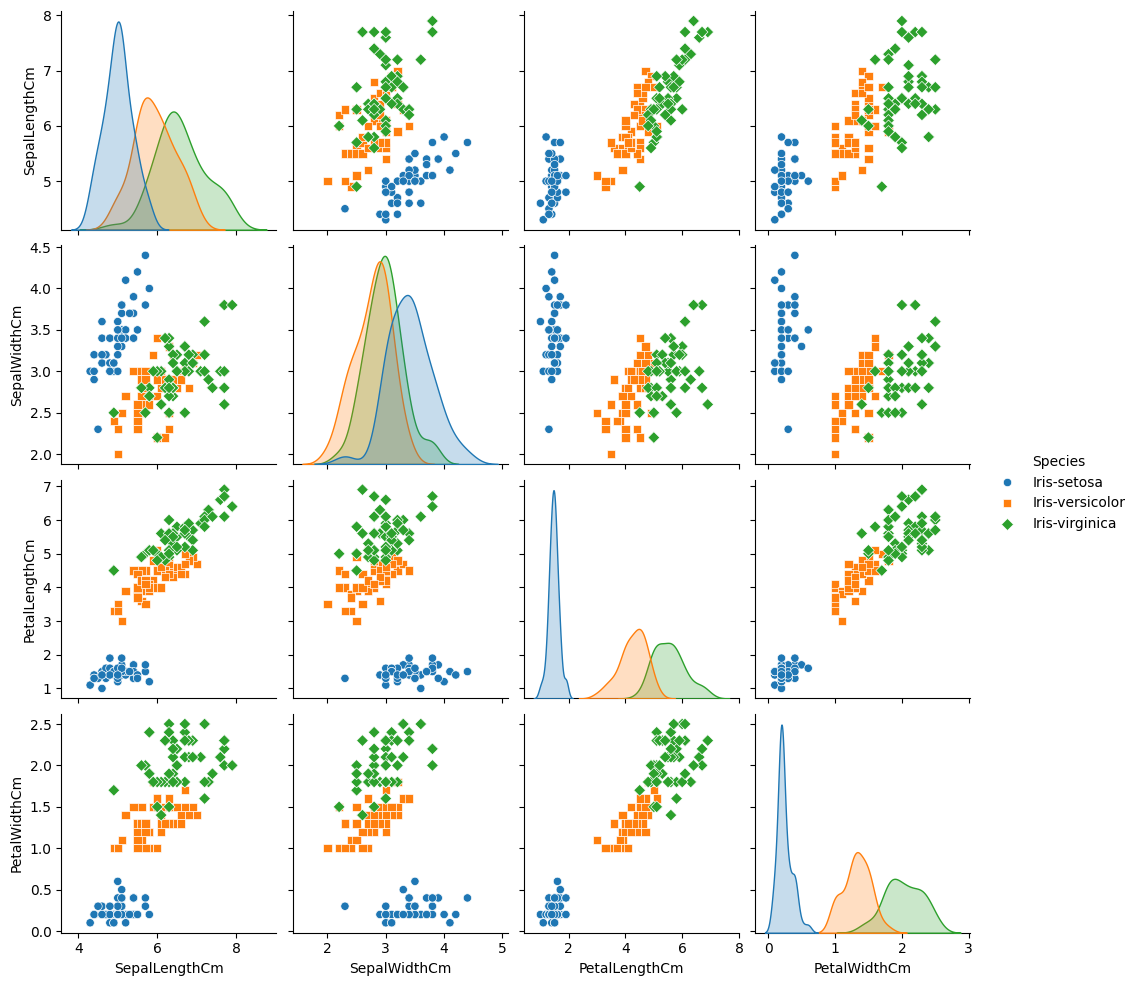

In [7]:
# Pairplot to visualize relationships between variables
sns.pairplot(iris_df, hue="Species", markers=["o", "s", "D"])
plt.show()

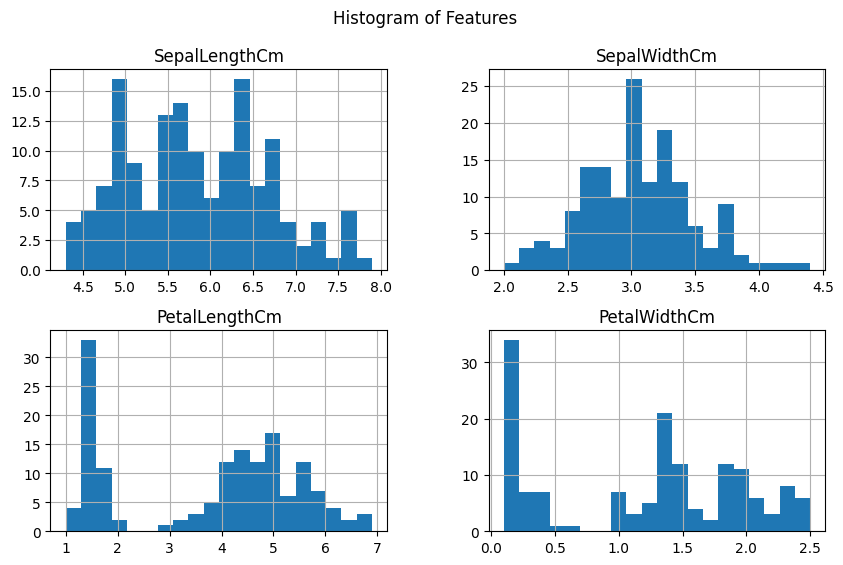

In [ ]:
# Histogram for each feature
iris_df.drop('Species', axis=1).hist(figsize=(10, 6), bins=20)
plt.suptitle('Histogram of Features')
plt.show()

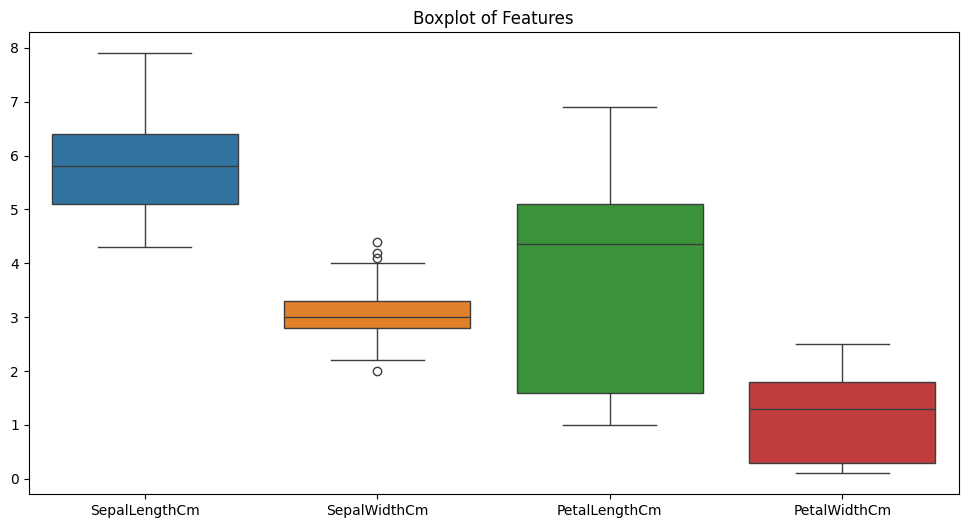

In [ ]:
# Boxplot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris_df.drop('Species', axis=1))
plt.title('Boxplot of Features')
plt.show()

## Correlation Matrix

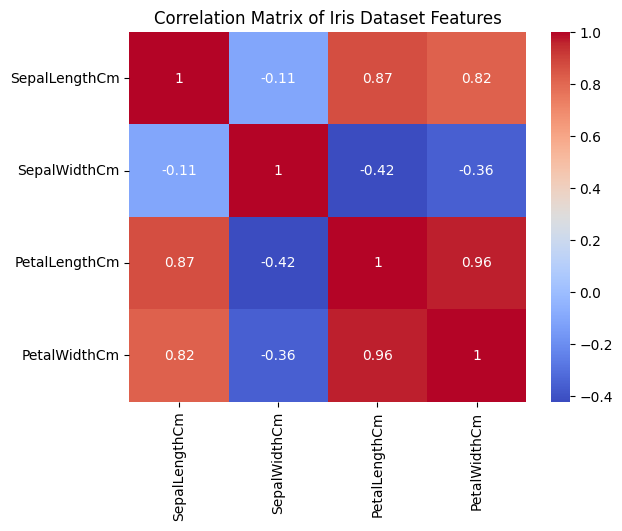

In [ ]:
# Correlation matrix
correlation_matrix = iris_df.drop('Species', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()

In [ ]:
# Mean and Median for each feature
means = iris_df.drop('Species', axis=1).mean()
medians = iris_df.drop('Species', axis=1).median()
print("Mean values:\n", means)
print("\nMedian values:\n", medians)

Mean values:
 SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
dtype: float64

Median values:
 SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
dtype: float64


In [ ]:
mode = iris_df.drop('Species', axis=1).mode()
print("Mode values:\n", mode)

Mode values:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.0           3.0            1.5           0.2


##Grouping by Species

In [ ]:
# Group by species and calculate summary statistics
species_grouped = iris_df.groupby('Species').describe()
species_grouped

SepalLengthCm                                              \
                        count   mean       std  min    25%  50%  75%  max   
Species                                                                     
Iris-setosa              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor          50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica           50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                SepalWidthCm         ... PetalLengthCm      PetalWidthCm  \
                       count   mean  ...           75%  max        count   
Species                              ...                                   
Iris-setosa             50.0  3.418  ...         1.575  1.9         50.0   
Iris-versicolor         50.0  2.770  ...         4.600  5.1         50.0   
Iris-virginica          50.0  2.974  ...         5.875  6.9         50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

##Regression Line

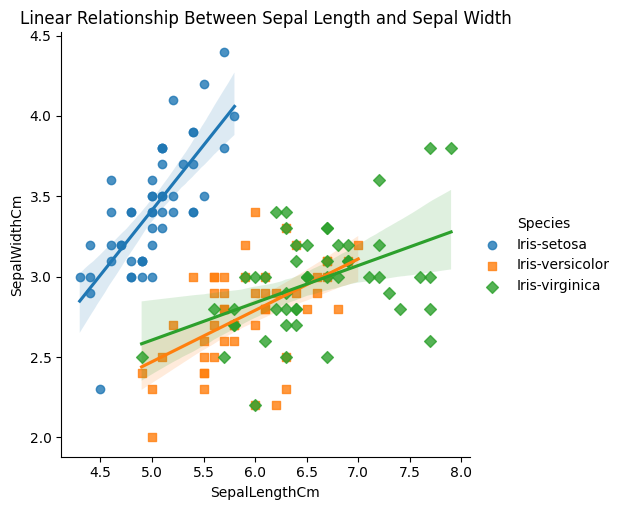

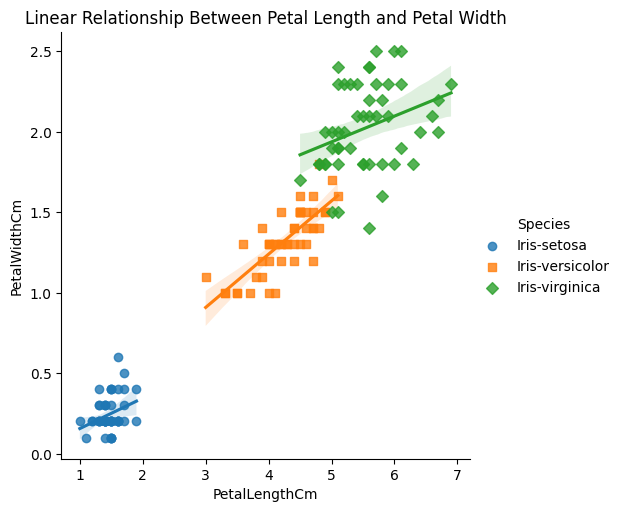

In [ ]:
# Import necessary libraries for lmplot
import seaborn as sns

# Create lmplot to visualize relationships between two features
sns.lmplot(data=iris_df, x="SepalLengthCm", y="SepalWidthCm", hue="Species", markers=["o", "s", "D"])

plt.title("Linear Relationship Between Sepal Length and Sepal Width")
plt.show()

# We can repeat this for other pairs of features
sns.lmplot(data=iris_df, x="PetalLengthCm", y="PetalWidthCm", hue="Species", markers=["o", "s", "D"])

plt.title("Linear Relationship Between Petal Length and Petal Width")
plt.show()

# Vectors and Matrices

In [ ]:
# 1. Vectors in Python
# Creating a vector (1D array)
v = np.array([3, 5, 7])
w = np.array([1, 2, 3])

In [ ]:
# Displaying the vectors
print(f"Vector v: {v}")
print(f"Vector w: {w}")

Vector v: [3 5 7]
Vector w: [1 2 3]


In [ ]:
# Vector addition
v_add_w = v + w
print(f"Vector addition (v + w): {v_add_w}")

Vector addition (v + w): [ 4  7 10]


In [ ]:
# Scalar multiplication
scalar = 2
v_scalar_mult = scalar * v
print(f"Scalar multiplication (2 * v): {v_scalar_mult}")

Scalar multiplication (2 * v): [ 6 10 14]


In [ ]:
v_dot_w = np.dot(v, w)
print(f"Dot product of v and w: {v_dot_w}")

In [ ]:
# 2. Matrices in Python
# Creating a 3x3 matrix
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [ ]:
# Displaying the matrix
print(f"Matrix A: \n{A}")

In [ ]:
# Matrix addition
B = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])
A_add_B = A + B
print(f"Matrix addition (A + B): \n{A_add_B}")

In [ ]:
# Scalar multiplication
A_scalar_mult = scalar * A
print(f"Scalar multiplication (2 * A): \n{A_scalar_mult}")

In [ ]:
# Matrix multiplication
A_mult_B = np.dot(A, B)
print(f"Matrix multiplication (A * B): \n{A_mult_B}")

In [ ]:
A_T = np.transpose(A)
print(f"Transpose of A: \n{A_T}")